In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
#1. Use the appropriate pandas methods to get the info on the data and describe it.
chipotle_data.describe()
chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [3]:
#2. List the column names in the dataset.
# chipotle_column = chipotle_data.count()
# chipotle_column
# chipotle_data.columns
sorted(chipotle_data)


['choice_description', 'item_name', 'item_price', 'order_id', 'quantity']

In [4]:
#3. What is the most ordered item? How many exactly were ordered?
'''Identitfy the quantity and item_names
    -Find out amount of orders for each item
    -'''
most_ordered =  chipotle_data.iloc[:,[1,2]]
# most_ordered

# items = chipotle_data ["item_name"].unique()
# items

item_orders = most_ordered.groupby('item_name').sum()
most = item_orders.sort_values('quantity',ascending=False)
most.head(1)


,quantity
item_name,
Chicken Bowl,761


In [17]:
#4. How much revenue did this chipotle make?
# Find out the sum of the column item price

total_price = chipotle_data ["item_price"].str.replace('$','',regex = False)

total_price.astype(float).sum()

        

34500.16

In [24]:
#5. How many orders were placed at this chipotle?
order_ids = chipotle_data ["order_id"].unique()
len(order_ids)

1834

In [27]:
#6. How many items cost more than $10?
total_price = chipotle_data ["item_price"].str.replace('$','',regex = False).astype(float)
(total_price >= 10.00).sum()




1130

In [32]:
#7. List the name of all unique items in the dataset.
unique_val = chipotle_data["item_name"].unique()
unique_val

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

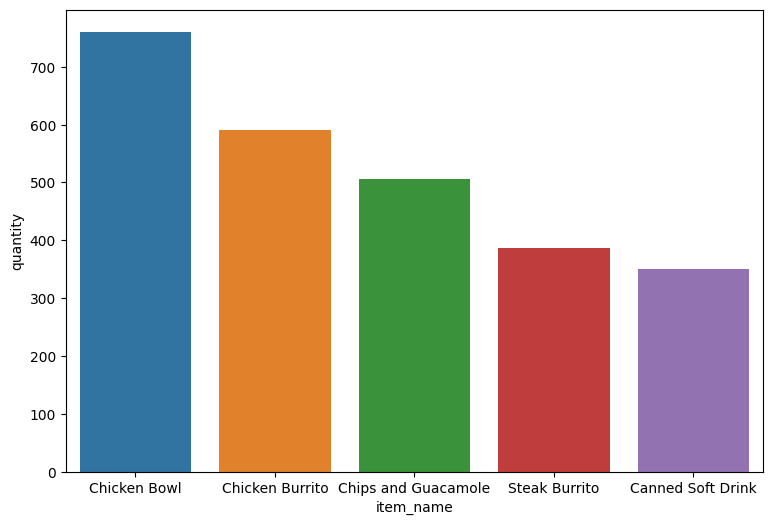

In [39]:
#8. Create a histogram of the top 5 items sold.
# sns.barplot(x = df['Sex'], y = df['Fare'])
top_five = most.head()
index = top_five.index
seaborn.barplot(x = index, y = top_five["quantity"])
fig = plt.gcf()
fig.set_size_inches(9,6)

plt.show()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


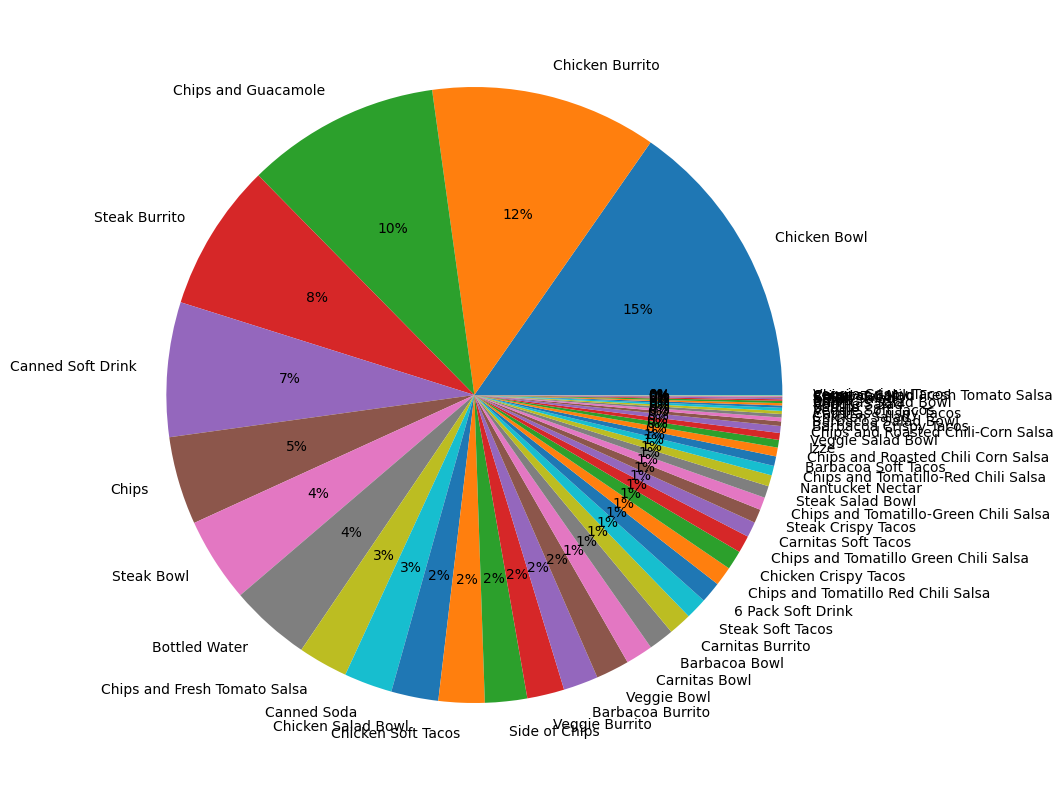

In [46]:
#9. Create a pie chart showing the number of times each item was order.
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
index = most.index 

plt.pie(most["quantity"], labels = index ,autopct ='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()




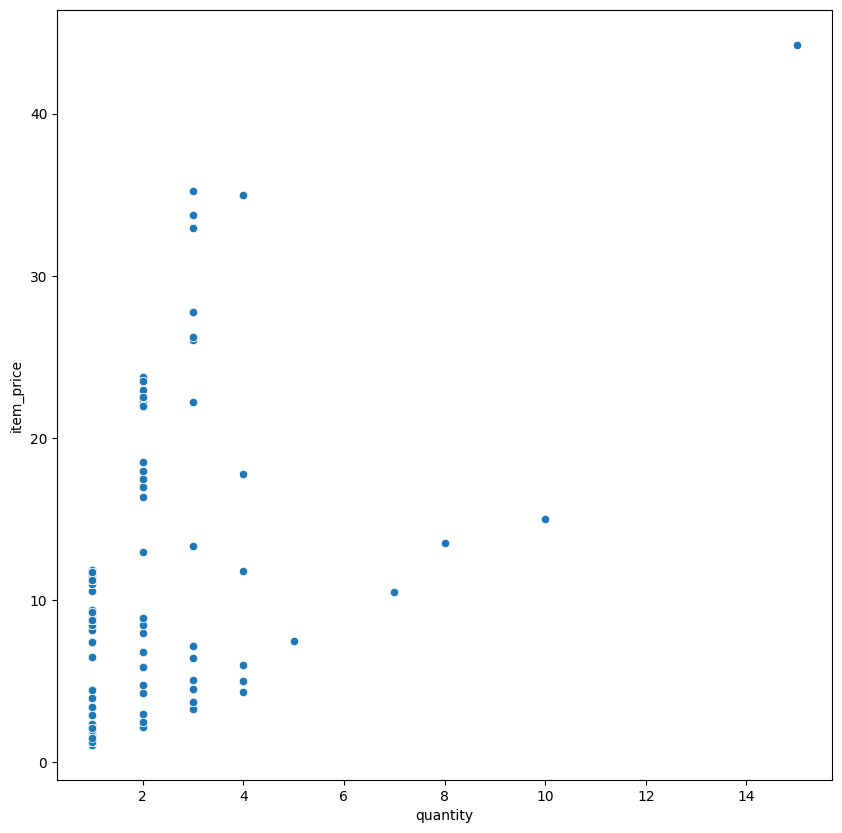

In [50]:
#10. Create a scatter plot showing how many items were order based on the price of the item.
#sns.scatterplot(data=tips, x="total_bill", y="tip")

x = chipotle_data ["quantity"]
y = chipotle_data ["item_price"].str.replace('$','',regex = False).astype(float)

seaborn.scatterplot(data = chipotle_data, x=x , y=y )
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

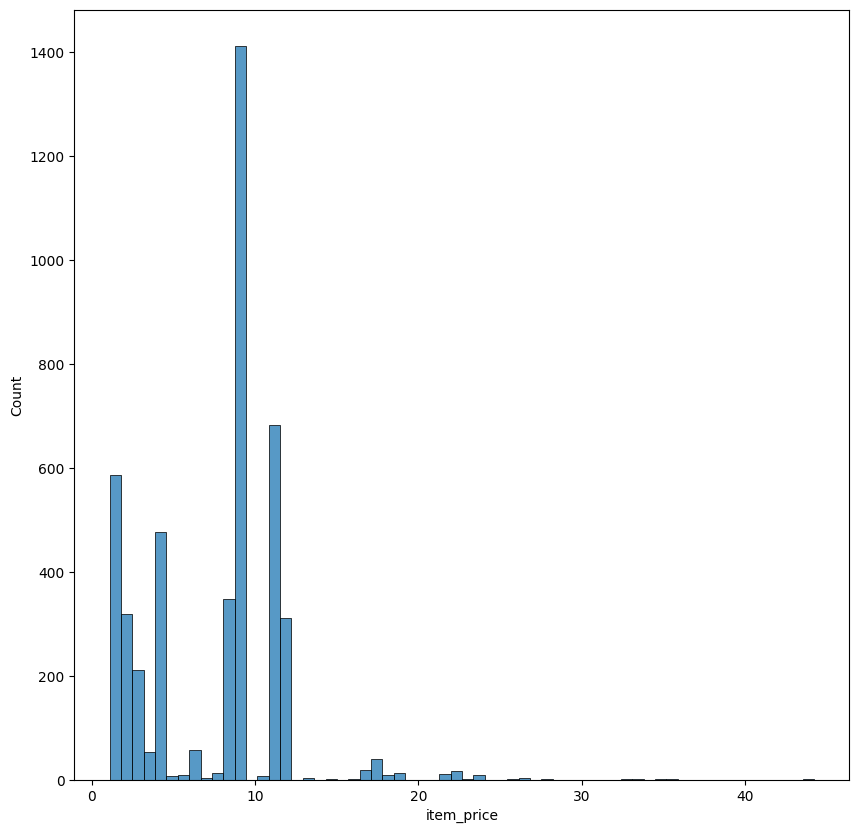

In [52]:
#11. Your team can come up with its own custom question to answer and visualize!
# Histogram visualizing how much money people spend at this chipotle.

# sns.histplot(data=penguins, x="flipper_length_mm")

x = chipotle_data ["item_price"].str.replace('$','',regex = False).astype(float)
seaborn.histplot(data = chipotle_data , x = x)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
